$$
\begin{array}{l}{\text { The gradient of } \ell(\theta) \text { is: }} \\ {\qquad \nabla \ell=\left\langle\begin{array}{c}{\sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right) x_{i}} \\ {\sum_{i=1}^{n}\left(y_{i}-h_{\theta}\left(x_{i}\right)\right)}\end{array}\right\rangle}\end{array}
$$
While the Hessian is $\ell(\theta)$
$$
H_{\ell(\hat{\theta})}=\left[\begin{array}{c}{\sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right)  x_ix_i, \sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right) x_i} \\ {\sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right) x_i, \sum_{i=1}^{n} h_{\theta}\left(x_{i}\right)\left(1-h_{\theta}\left(x_{i}\right)\right)}\end{array}\right]
$$

$$where\ h_{\theta}(x)=\frac{1}{1+e^{-z}} \text { and } z=\theta_{1} x+\theta_{2}
$$

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

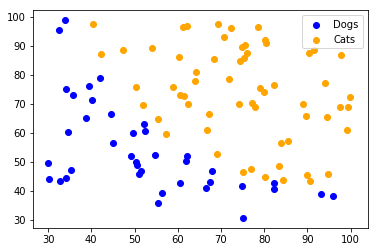

In [14]:
raw_data = pd.read_csv('marks.txt')
raw_data.columns = ['dogs','cats','labels']
# seperate features and labels
features = raw_data.iloc[:,:-1]  # contains dog and cat features
labels = raw_data.iloc[:,-1]  # contains label 0 and 1
label_1 = features.loc[labels == 1]  # contains dog and cat feature of 1 label
label_0 = features.loc[labels == 0]  # contains dog and cat feature of 0 label
labels = np.array(labels)  
features = np.array(features)
plt.scatter(label_0.iloc[:,0],label_0.iloc[:,1],c = ['blue'],label = 'Dogs')
plt.scatter(label_1.iloc[:,0],label_1.iloc[:,1],c = ['orange'],label = 'Cats')
plt.legend()
plt.show()

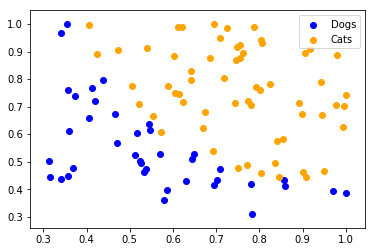

In [16]:
labels = (labels.reshape(99,1))
# Normalizing  the data
lab1 = label_1/np.max(label_1)
lab0 = label_0/np.max(label_0) 
plt.scatter(lab0.iloc[:,0],lab0.iloc[:,1],c = ['blue'],label = 'Dogs')
plt.scatter(lab1.iloc[:,0],lab1.iloc[:,1],c = ['orange'],label = 'Cats')
plt.legend()
plt.show() # this graph shows that we have getting same graph before and after normalizing the data
div = int(.7*features.shape[0])
# Data seperation
training_data = features[ : div ,: ]
training_data /=np.max(training_data) 
testing_data = features[div:,:]
testing_data /=np.max(testing_data)
training_label = labels[:div]
testing_label = labels[div:]

In [27]:
training_data.shape  # 69 * 2


(69, 2)

In [81]:
alpha = 0.1
epsilon = 0.000001
initial_theta0 = np.array(1) 
initial_theta = np.ones([training_data.shape[1],1])
i = 0 
fc = []
itera = []

def sigmoid(theta0, theta , features):
    z = theta0 + np.dot(features ,theta)
    return 1 / (1 + np.exp(-z))

def log_liklihood(data , label , theta0 , theta ):
    val = (-(np.matmul(label.T , np.log( sigmoid(theta0 , theta , data))) + 
       (np.matmul( (1 - label).T , np.log(1 - sigmoid(theta0,theta,data)) ) ) )/data.shape[0]) 
    return val.reshape(1)

def gradient(data , label , theta0 , theta):
    gradient_0 = np.sum(sigmoid(theta0,theta,data) - label) / data.shape[0]
    gradient_ = np.dot(data.T , (sigmoid(theta0,theta,data) - label))
    return gradient_0 , gradient_

initial_cost = log_liklihood(training_data , training_label , initial_theta0 , initial_theta)
#final_cost = log_liklihood(training_data , training_label , final_theta0 , final_theta)

grad0 , grad = gradient(training_data , training_label , initial_theta0 , initial_theta)

def hessian(theta0 ,theta  , data):                                                          
    sp = sigmoid(theta0 , theta , data)                                        
    d00 = np.sum((sp * (1 - sp)) * 1 * 1)                  
    d01 = np.sum((sp * (1 - sp)) * 1 * data[:,0])                  
    d02 = np.sum((sp * (1 - sp)) * 1 * data[:,1])                  

    d10 = np.sum((sp * (1 - sp)) * data[:,0] * 1)                  
    d11 = np.sum((sp * (1 - sp)) * data[:,0] * data[:,0])                  
    d12 = np.sum((sp * (1 - sp)) * data[:,0] * data[:,1])                  

    d20 = np.sum((sp * (1 - sp)) * data[:,1] * 1)                  
    d21 = np.sum((sp * (1 - sp)) * data[:,1] * data[:,0])                  
    d22 = np.sum((sp * (1 - sp)) * data[:,1] * data[:,1])
    
    return  np.array([[d00 , d01 , d02] , [d10 ,d11 ,d12] , [d20 , d21 , d22]])

h = hessian(initial_theta0 , initial_theta , training_data)

np.dot(np.linalg.inv(h))

array([[-0.00262082,  0.00185578,  0.00203935],
       [ 0.00185578,  0.03183792, -0.03198164],
       [ 0.00203935, -0.03198164,  0.03203837]])

In [19]:
def sigmoid(theta0, theta , features):
    z = theta0 + np.dot(features ,theta)
    return 1 / (1 + np.exp(-z))

def log_liklihood(training_label ,theta0 , the ):
    (-(np.matmul(training_label.T , np.log(sigmoid(theta0,theta,training_data))) 
                  + (np.matmul((1-training_label).T,np.log(1-sigmoid(initial_theta0,initial_theta,training_data)))))
                    /training_data.shape[0]) 
alpha = 0.1
epsilon = 0.000001
initial_theta0 = np.array(1) 
initial_theta = np.ones([training_data.shape[1],1])
i = 0 
fc = []
itera = []
while(True):
    i+=1
    
    gradient0 = np.sum(sigmoid(initial_theta0,initial_theta,training_data) - training_label) / training_data.shape[0]
    gradient = np.dot(training_data.T , (sigmoid(initial_theta0,initial_theta,training_data) - training_label))
    
    
    initial_cost = (-(np.matmul(training_label.T,np.log(sigmoid(initial_theta0,initial_theta,training_data))) 
                  + (np.matmul((1-training_label).T,np.log(1-sigmoid(initial_theta0,initial_theta,training_data)))))
                    /training_data.shape[0])  
    initial_cost = initial_cost.reshape(1)
    
    final_cost = (-(np.matmul(training_label.T,np.log(sigmoid(final_theta0,final_theta,training_data))) 
                 + (np.matmul((1-training_label).T,np.log(1-sigmoid(final_theta0,final_theta,training_data)))))
                  /training_data.shape[0])
    final_cost = final_cost.reshape(1)    
    
    if(abs(final_cost - initial_cost) < epsilon):
        break
    print('iteration {} neg log liklihood {}'.format(i,initial_cost))
    
    initial_theta = final_theta
    initial_theta0 = final_theta0
    itera.append(i)
    fc.append(final_cost)


iteration 1 neg log liklihood [1.09181283]
iteration 2 neg log liklihood [0.75050751]
iteration 3 neg log liklihood [0.74908172]
iteration 4 neg log liklihood [0.7478778]
iteration 5 neg log liklihood [0.74676357]
iteration 6 neg log liklihood [0.74570687]
iteration 7 neg log liklihood [0.74469602]
iteration 8 neg log liklihood [0.74372449]
iteration 9 neg log liklihood [0.74278734]
iteration 10 neg log liklihood [0.74188042]
iteration 11 neg log liklihood [0.74100013]
iteration 12 neg log liklihood [0.74014334]
iteration 13 neg log liklihood [0.73930728]
iteration 14 neg log liklihood [0.73848954]
iteration 15 neg log liklihood [0.73768802]
iteration 16 neg log liklihood [0.73690086]
iteration 17 neg log liklihood [0.73612645]
iteration 18 neg log liklihood [0.73536336]
iteration 19 neg log liklihood [0.73461035]
iteration 20 neg log liklihood [0.73386633]
iteration 21 neg log liklihood [0.73313035]
iteration 22 neg log liklihood [0.73240157]
iteration 23 neg log liklihood [0.73167925

iteration 267 neg log liklihood [0.596973]
iteration 268 neg log liklihood [0.59653689]
iteration 269 neg log liklihood [0.59610156]
iteration 270 neg log liklihood [0.59566703]
iteration 271 neg log liklihood [0.59523328]
iteration 272 neg log liklihood [0.59480031]
iteration 273 neg log liklihood [0.59436813]
iteration 274 neg log liklihood [0.59393673]
iteration 275 neg log liklihood [0.59350611]
iteration 276 neg log liklihood [0.59307627]
iteration 277 neg log liklihood [0.5926472]
iteration 278 neg log liklihood [0.59221891]
iteration 279 neg log liklihood [0.59179139]
iteration 280 neg log liklihood [0.59136464]
iteration 281 neg log liklihood [0.59093866]
iteration 282 neg log liklihood [0.59051345]
iteration 283 neg log liklihood [0.59008901]
iteration 284 neg log liklihood [0.58966533]
iteration 285 neg log liklihood [0.58924242]
iteration 286 neg log liklihood [0.58882027]
iteration 287 neg log liklihood [0.58839887]
iteration 288 neg log liklihood [0.58797824]
iteration 289

iteration 450 neg log liklihood [0.52877306]
iteration 451 neg log liklihood [0.52845664]
iteration 452 neg log liklihood [0.52814074]
iteration 453 neg log liklihood [0.52782538]
iteration 454 neg log liklihood [0.52751054]
iteration 455 neg log liklihood [0.52719624]
iteration 456 neg log liklihood [0.52688246]
iteration 457 neg log liklihood [0.52656921]
iteration 458 neg log liklihood [0.52625649]
iteration 459 neg log liklihood [0.52594429]
iteration 460 neg log liklihood [0.52563262]
iteration 461 neg log liklihood [0.52532146]
iteration 462 neg log liklihood [0.52501083]
iteration 463 neg log liklihood [0.52470072]
iteration 464 neg log liklihood [0.52439113]
iteration 465 neg log liklihood [0.52408205]
iteration 466 neg log liklihood [0.52377349]
iteration 467 neg log liklihood [0.52346545]
iteration 468 neg log liklihood [0.52315792]
iteration 469 neg log liklihood [0.52285091]
iteration 470 neg log liklihood [0.52254441]
iteration 471 neg log liklihood [0.52223842]
iteration 

iteration 685 neg log liklihood [0.46689365]
iteration 686 neg log liklihood [0.46667571]
iteration 687 neg log liklihood [0.4664581]
iteration 688 neg log liklihood [0.46624081]
iteration 689 neg log liklihood [0.46602385]
iteration 690 neg log liklihood [0.46580721]
iteration 691 neg log liklihood [0.46559088]
iteration 692 neg log liklihood [0.46537488]
iteration 693 neg log liklihood [0.4651592]
iteration 694 neg log liklihood [0.46494384]
iteration 695 neg log liklihood [0.46472879]
iteration 696 neg log liklihood [0.46451407]
iteration 697 neg log liklihood [0.46429966]
iteration 698 neg log liklihood [0.46408557]
iteration 699 neg log liklihood [0.46387179]
iteration 700 neg log liklihood [0.46365833]
iteration 701 neg log liklihood [0.46344519]
iteration 702 neg log liklihood [0.46323235]
iteration 703 neg log liklihood [0.46301984]
iteration 704 neg log liklihood [0.46280763]
iteration 705 neg log liklihood [0.46259574]
iteration 706 neg log liklihood [0.46238416]
iteration 70

iteration 930 neg log liklihood [0.42178517]
iteration 931 neg log liklihood [0.42163013]
iteration 932 neg log liklihood [0.42147529]
iteration 933 neg log liklihood [0.42132065]
iteration 934 neg log liklihood [0.42116621]
iteration 935 neg log liklihood [0.42101197]
iteration 936 neg log liklihood [0.42085793]
iteration 937 neg log liklihood [0.42070409]
iteration 938 neg log liklihood [0.42055045]
iteration 939 neg log liklihood [0.420397]
iteration 940 neg log liklihood [0.42024376]
iteration 941 neg log liklihood [0.42009071]
iteration 942 neg log liklihood [0.41993786]
iteration 943 neg log liklihood [0.4197852]
iteration 944 neg log liklihood [0.41963274]
iteration 945 neg log liklihood [0.41948048]
iteration 946 neg log liklihood [0.41932842]
iteration 947 neg log liklihood [0.41917654]
iteration 948 neg log liklihood [0.41902487]
iteration 949 neg log liklihood [0.41887339]
iteration 950 neg log liklihood [0.4187221]
iteration 951 neg log liklihood [0.41857101]
iteration 952 

iteration 1254 neg log liklihood [0.38030516]
iteration 1255 neg log liklihood [0.38019971]
iteration 1256 neg log liklihood [0.38009437]
iteration 1257 neg log liklihood [0.37998915]
iteration 1258 neg log liklihood [0.37988405]
iteration 1259 neg log liklihood [0.37977906]
iteration 1260 neg log liklihood [0.37967418]
iteration 1261 neg log liklihood [0.37956942]
iteration 1262 neg log liklihood [0.37946477]
iteration 1263 neg log liklihood [0.37936023]
iteration 1264 neg log liklihood [0.37925581]
iteration 1265 neg log liklihood [0.3791515]
iteration 1266 neg log liklihood [0.37904731]
iteration 1267 neg log liklihood [0.37894322]
iteration 1268 neg log liklihood [0.37883925]
iteration 1269 neg log liklihood [0.3787354]
iteration 1270 neg log liklihood [0.37863165]
iteration 1271 neg log liklihood [0.37852802]
iteration 1272 neg log liklihood [0.3784245]
iteration 1273 neg log liklihood [0.37832109]
iteration 1274 neg log liklihood [0.3782178]
iteration 1275 neg log liklihood [0.37

iteration 1586 neg log liklihood [0.35066872]
iteration 1587 neg log liklihood [0.35059327]
iteration 1588 neg log liklihood [0.35051789]
iteration 1589 neg log liklihood [0.35044259]
iteration 1590 neg log liklihood [0.35036735]
iteration 1591 neg log liklihood [0.35029218]
iteration 1592 neg log liklihood [0.35021708]
iteration 1593 neg log liklihood [0.35014205]
iteration 1594 neg log liklihood [0.35006709]
iteration 1595 neg log liklihood [0.3499922]
iteration 1596 neg log liklihood [0.34991738]
iteration 1597 neg log liklihood [0.34984263]
iteration 1598 neg log liklihood [0.34976795]
iteration 1599 neg log liklihood [0.34969334]
iteration 1600 neg log liklihood [0.3496188]
iteration 1601 neg log liklihood [0.34954432]
iteration 1602 neg log liklihood [0.34946992]
iteration 1603 neg log liklihood [0.34939558]
iteration 1604 neg log liklihood [0.34932132]
iteration 1605 neg log liklihood [0.34924712]
iteration 1606 neg log liklihood [0.34917299]
iteration 1607 neg log liklihood [0.

iteration 1877 neg log liklihood [0.33133132]
iteration 1878 neg log liklihood [0.33127286]
iteration 1879 neg log liklihood [0.33121444]
iteration 1880 neg log liklihood [0.33115607]
iteration 1881 neg log liklihood [0.33109775]
iteration 1882 neg log liklihood [0.33103948]
iteration 1883 neg log liklihood [0.33098126]
iteration 1884 neg log liklihood [0.33092308]
iteration 1885 neg log liklihood [0.33086495]
iteration 1886 neg log liklihood [0.33080687]
iteration 1887 neg log liklihood [0.33074884]
iteration 1888 neg log liklihood [0.33069085]
iteration 1889 neg log liklihood [0.33063292]
iteration 1890 neg log liklihood [0.33057503]
iteration 1891 neg log liklihood [0.33051718]
iteration 1892 neg log liklihood [0.33045939]
iteration 1893 neg log liklihood [0.33040164]
iteration 1894 neg log liklihood [0.33034394]
iteration 1895 neg log liklihood [0.33028629]
iteration 1896 neg log liklihood [0.33022868]
iteration 1897 neg log liklihood [0.33017112]
iteration 1898 neg log liklihood [

iteration 2123 neg log liklihood [0.31826936]
iteration 2124 neg log liklihood [0.31822117]
iteration 2125 neg log liklihood [0.31817303]
iteration 2126 neg log liklihood [0.31812492]
iteration 2127 neg log liklihood [0.31807685]
iteration 2128 neg log liklihood [0.31802881]
iteration 2129 neg log liklihood [0.31798081]
iteration 2130 neg log liklihood [0.31793285]
iteration 2131 neg log liklihood [0.31788492]
iteration 2132 neg log liklihood [0.31783702]
iteration 2133 neg log liklihood [0.31778917]
iteration 2134 neg log liklihood [0.31774134]
iteration 2135 neg log liklihood [0.31769356]
iteration 2136 neg log liklihood [0.31764581]
iteration 2137 neg log liklihood [0.31759809]
iteration 2138 neg log liklihood [0.31755041]
iteration 2139 neg log liklihood [0.31750277]
iteration 2140 neg log liklihood [0.31745516]
iteration 2141 neg log liklihood [0.31740759]
iteration 2142 neg log liklihood [0.31736005]
iteration 2143 neg log liklihood [0.31731255]
iteration 2144 neg log liklihood [

iteration 2469 neg log liklihood [0.30351075]
iteration 2470 neg log liklihood [0.30347302]
iteration 2471 neg log liklihood [0.30343531]
iteration 2472 neg log liklihood [0.30339763]
iteration 2473 neg log liklihood [0.30335997]
iteration 2474 neg log liklihood [0.30332234]
iteration 2475 neg log liklihood [0.30328474]
iteration 2476 neg log liklihood [0.30324716]
iteration 2477 neg log liklihood [0.3032096]
iteration 2478 neg log liklihood [0.30317207]
iteration 2479 neg log liklihood [0.30313456]
iteration 2480 neg log liklihood [0.30309708]
iteration 2481 neg log liklihood [0.30305962]
iteration 2482 neg log liklihood [0.30302219]
iteration 2483 neg log liklihood [0.30298479]
iteration 2484 neg log liklihood [0.3029474]
iteration 2485 neg log liklihood [0.30291005]
iteration 2486 neg log liklihood [0.30287271]
iteration 2487 neg log liklihood [0.30283541]
iteration 2488 neg log liklihood [0.30279812]
iteration 2489 neg log liklihood [0.30276086]
iteration 2490 neg log liklihood [0.

iteration 2684 neg log liklihood [0.29593835]
iteration 2685 neg log liklihood [0.2959055]
iteration 2686 neg log liklihood [0.29587266]
iteration 2687 neg log liklihood [0.29583985]
iteration 2688 neg log liklihood [0.29580706]
iteration 2689 neg log liklihood [0.29577428]
iteration 2690 neg log liklihood [0.29574153]
iteration 2691 neg log liklihood [0.2957088]
iteration 2692 neg log liklihood [0.29567609]
iteration 2693 neg log liklihood [0.2956434]
iteration 2694 neg log liklihood [0.29561073]
iteration 2695 neg log liklihood [0.29557808]
iteration 2696 neg log liklihood [0.29554545]
iteration 2697 neg log liklihood [0.29551284]
iteration 2698 neg log liklihood [0.29548025]
iteration 2699 neg log liklihood [0.29544768]
iteration 2700 neg log liklihood [0.29541513]
iteration 2701 neg log liklihood [0.2953826]
iteration 2702 neg log liklihood [0.29535009]
iteration 2703 neg log liklihood [0.2953176]
iteration 2704 neg log liklihood [0.29528513]
iteration 2705 neg log liklihood [0.295

iteration 2960 neg log liklihood [0.28758596]
iteration 2961 neg log liklihood [0.2875581]
iteration 2962 neg log liklihood [0.28753026]
iteration 2963 neg log liklihood [0.28750244]
iteration 2964 neg log liklihood [0.28747463]
iteration 2965 neg log liklihood [0.28744684]
iteration 2966 neg log liklihood [0.28741906]
iteration 2967 neg log liklihood [0.2873913]
iteration 2968 neg log liklihood [0.28736355]
iteration 2969 neg log liklihood [0.28733582]
iteration 2970 neg log liklihood [0.28730811]
iteration 2971 neg log liklihood [0.28728041]
iteration 2972 neg log liklihood [0.28725273]
iteration 2973 neg log liklihood [0.28722507]
iteration 2974 neg log liklihood [0.28719742]
iteration 2975 neg log liklihood [0.28716978]
iteration 2976 neg log liklihood [0.28714217]
iteration 2977 neg log liklihood [0.28711456]
iteration 2978 neg log liklihood [0.28708698]
iteration 2979 neg log liklihood [0.28705941]
iteration 2980 neg log liklihood [0.28703185]
iteration 2981 neg log liklihood [0.

iteration 3262 neg log liklihood [0.27984324]
iteration 3263 neg log liklihood [0.27981966]
iteration 3264 neg log liklihood [0.27979609]
iteration 3265 neg log liklihood [0.27977253]
iteration 3266 neg log liklihood [0.27974899]
iteration 3267 neg log liklihood [0.27972546]
iteration 3268 neg log liklihood [0.27970194]
iteration 3269 neg log liklihood [0.27967843]
iteration 3270 neg log liklihood [0.27965494]
iteration 3271 neg log liklihood [0.27963145]
iteration 3272 neg log liklihood [0.27960798]
iteration 3273 neg log liklihood [0.27958453]
iteration 3274 neg log liklihood [0.27956108]
iteration 3275 neg log liklihood [0.27953765]
iteration 3276 neg log liklihood [0.27951423]
iteration 3277 neg log liklihood [0.27949082]
iteration 3278 neg log liklihood [0.27946743]
iteration 3279 neg log liklihood [0.27944404]
iteration 3280 neg log liklihood [0.27942067]
iteration 3281 neg log liklihood [0.27939732]
iteration 3282 neg log liklihood [0.27937397]
iteration 3283 neg log liklihood [

iteration 3537 neg log liklihood [0.2737976]
iteration 3538 neg log liklihood [0.27377711]
iteration 3539 neg log liklihood [0.27375664]
iteration 3540 neg log liklihood [0.27373618]
iteration 3541 neg log liklihood [0.27371573]
iteration 3542 neg log liklihood [0.27369528]
iteration 3543 neg log liklihood [0.27367485]
iteration 3544 neg log liklihood [0.27365443]
iteration 3545 neg log liklihood [0.27363402]
iteration 3546 neg log liklihood [0.27361361]
iteration 3547 neg log liklihood [0.27359322]
iteration 3548 neg log liklihood [0.27357284]
iteration 3549 neg log liklihood [0.27355247]
iteration 3550 neg log liklihood [0.27353211]
iteration 3551 neg log liklihood [0.27351176]
iteration 3552 neg log liklihood [0.27349141]
iteration 3553 neg log liklihood [0.27347108]
iteration 3554 neg log liklihood [0.27345076]
iteration 3555 neg log liklihood [0.27343045]
iteration 3556 neg log liklihood [0.27341015]
iteration 3557 neg log liklihood [0.27338986]
iteration 3558 neg log liklihood [0

iteration 3793 neg log liklihood [0.26886564]
iteration 3794 neg log liklihood [0.26884753]
iteration 3795 neg log liklihood [0.26882943]
iteration 3796 neg log liklihood [0.26881133]
iteration 3797 neg log liklihood [0.26879325]
iteration 3798 neg log liklihood [0.26877517]
iteration 3799 neg log liklihood [0.2687571]
iteration 3800 neg log liklihood [0.26873904]
iteration 3801 neg log liklihood [0.26872099]
iteration 3802 neg log liklihood [0.26870295]
iteration 3803 neg log liklihood [0.26868491]
iteration 3804 neg log liklihood [0.26866689]
iteration 3805 neg log liklihood [0.26864887]
iteration 3806 neg log liklihood [0.26863086]
iteration 3807 neg log liklihood [0.26861286]
iteration 3808 neg log liklihood [0.26859487]
iteration 3809 neg log liklihood [0.26857688]
iteration 3810 neg log liklihood [0.26855891]
iteration 3811 neg log liklihood [0.26854094]
iteration 3812 neg log liklihood [0.26852298]
iteration 3813 neg log liklihood [0.26850503]
iteration 3814 neg log liklihood [0

iteration 4016 neg log liklihood [0.26502619]
iteration 4017 neg log liklihood [0.26500983]
iteration 4018 neg log liklihood [0.26499348]
iteration 4019 neg log liklihood [0.26497714]
iteration 4020 neg log liklihood [0.2649608]
iteration 4021 neg log liklihood [0.26494447]
iteration 4022 neg log liklihood [0.26492814]
iteration 4023 neg log liklihood [0.26491183]
iteration 4024 neg log liklihood [0.26489552]
iteration 4025 neg log liklihood [0.26487922]
iteration 4026 neg log liklihood [0.26486292]
iteration 4027 neg log liklihood [0.26484664]
iteration 4028 neg log liklihood [0.26483036]
iteration 4029 neg log liklihood [0.26481408]
iteration 4030 neg log liklihood [0.26479782]
iteration 4031 neg log liklihood [0.26478156]
iteration 4032 neg log liklihood [0.26476531]
iteration 4033 neg log liklihood [0.26474906]
iteration 4034 neg log liklihood [0.26473283]
iteration 4035 neg log liklihood [0.2647166]
iteration 4036 neg log liklihood [0.26470038]
iteration 4037 neg log liklihood [0.

iteration 4334 neg log liklihood [0.26016696]
iteration 4335 neg log liklihood [0.2601527]
iteration 4336 neg log liklihood [0.26013844]
iteration 4337 neg log liklihood [0.26012419]
iteration 4338 neg log liklihood [0.26010994]
iteration 4339 neg log liklihood [0.2600957]
iteration 4340 neg log liklihood [0.26008146]
iteration 4341 neg log liklihood [0.26006723]
iteration 4342 neg log liklihood [0.26005301]
iteration 4343 neg log liklihood [0.26003879]
iteration 4344 neg log liklihood [0.26002458]
iteration 4345 neg log liklihood [0.26001037]
iteration 4346 neg log liklihood [0.25999617]
iteration 4347 neg log liklihood [0.25998198]
iteration 4348 neg log liklihood [0.25996779]
iteration 4349 neg log liklihood [0.25995361]
iteration 4350 neg log liklihood [0.25993943]
iteration 4351 neg log liklihood [0.25992526]
iteration 4352 neg log liklihood [0.2599111]
iteration 4353 neg log liklihood [0.25989694]
iteration 4354 neg log liklihood [0.25988279]
iteration 4355 neg log liklihood [0.2

iteration 4619 neg log liklihood [0.25632912]
iteration 4620 neg log liklihood [0.25631641]
iteration 4621 neg log liklihood [0.25630371]
iteration 4622 neg log liklihood [0.25629102]
iteration 4623 neg log liklihood [0.25627833]
iteration 4624 neg log liklihood [0.25626564]
iteration 4625 neg log liklihood [0.25625296]
iteration 4626 neg log liklihood [0.25624029]
iteration 4627 neg log liklihood [0.25622761]
iteration 4628 neg log liklihood [0.25621495]
iteration 4629 neg log liklihood [0.25620229]
iteration 4630 neg log liklihood [0.25618963]
iteration 4631 neg log liklihood [0.25617698]
iteration 4632 neg log liklihood [0.25616434]
iteration 4633 neg log liklihood [0.2561517]
iteration 4634 neg log liklihood [0.25613906]
iteration 4635 neg log liklihood [0.25612643]
iteration 4636 neg log liklihood [0.2561138]
iteration 4637 neg log liklihood [0.25610118]
iteration 4638 neg log liklihood [0.25608857]
iteration 4639 neg log liklihood [0.25607596]
iteration 4640 neg log liklihood [0.

iteration 4893 neg log liklihood [0.25302623]
iteration 4894 neg log liklihood [0.2530148]
iteration 4895 neg log liklihood [0.25300338]
iteration 4896 neg log liklihood [0.25299195]
iteration 4897 neg log liklihood [0.25298054]
iteration 4898 neg log liklihood [0.25296912]
iteration 4899 neg log liklihood [0.25295771]
iteration 4900 neg log liklihood [0.25294631]
iteration 4901 neg log liklihood [0.25293491]
iteration 4902 neg log liklihood [0.25292351]
iteration 4903 neg log liklihood [0.25291212]
iteration 4904 neg log liklihood [0.25290073]
iteration 4905 neg log liklihood [0.25288935]
iteration 4906 neg log liklihood [0.25287797]
iteration 4907 neg log liklihood [0.25286659]
iteration 4908 neg log liklihood [0.25285522]
iteration 4909 neg log liklihood [0.25284385]
iteration 4910 neg log liklihood [0.25283249]
iteration 4911 neg log liklihood [0.25282113]
iteration 4912 neg log liklihood [0.25280978]
iteration 4913 neg log liklihood [0.25279843]
iteration 4914 neg log liklihood [0

iteration 5190 neg log liklihood [0.24981071]
iteration 5191 neg log liklihood [0.24980046]
iteration 5192 neg log liklihood [0.24979022]
iteration 5193 neg log liklihood [0.24977997]
iteration 5194 neg log liklihood [0.24976973]
iteration 5195 neg log liklihood [0.2497595]
iteration 5196 neg log liklihood [0.24974927]
iteration 5197 neg log liklihood [0.24973904]
iteration 5198 neg log liklihood [0.24972882]
iteration 5199 neg log liklihood [0.2497186]
iteration 5200 neg log liklihood [0.24970838]
iteration 5201 neg log liklihood [0.24969817]
iteration 5202 neg log liklihood [0.24968796]
iteration 5203 neg log liklihood [0.24967775]
iteration 5204 neg log liklihood [0.24966755]
iteration 5205 neg log liklihood [0.24965735]
iteration 5206 neg log liklihood [0.24964716]
iteration 5207 neg log liklihood [0.24963697]
iteration 5208 neg log liklihood [0.24962678]
iteration 5209 neg log liklihood [0.24961659]
iteration 5210 neg log liklihood [0.24960641]
iteration 5211 neg log liklihood [0.

iteration 5440 neg log liklihood [0.24735787]
iteration 5441 neg log liklihood [0.24734849]
iteration 5442 neg log liklihood [0.2473391]
iteration 5443 neg log liklihood [0.24732972]
iteration 5444 neg log liklihood [0.24732034]
iteration 5445 neg log liklihood [0.24731097]
iteration 5446 neg log liklihood [0.24730159]
iteration 5447 neg log liklihood [0.24729223]
iteration 5448 neg log liklihood [0.24728286]
iteration 5449 neg log liklihood [0.2472735]
iteration 5450 neg log liklihood [0.24726414]
iteration 5451 neg log liklihood [0.24725478]
iteration 5452 neg log liklihood [0.24724543]
iteration 5453 neg log liklihood [0.24723608]
iteration 5454 neg log liklihood [0.24722674]
iteration 5455 neg log liklihood [0.24721739]
iteration 5456 neg log liklihood [0.24720805]
iteration 5457 neg log liklihood [0.24719872]
iteration 5458 neg log liklihood [0.24718938]
iteration 5459 neg log liklihood [0.24718005]
iteration 5460 neg log liklihood [0.24717073]
iteration 5461 neg log liklihood [0.

iteration 5719 neg log liklihood [0.24485847]
iteration 5720 neg log liklihood [0.24484993]
iteration 5721 neg log liklihood [0.24484138]
iteration 5722 neg log liklihood [0.24483284]
iteration 5723 neg log liklihood [0.24482431]
iteration 5724 neg log liklihood [0.24481577]
iteration 5725 neg log liklihood [0.24480724]
iteration 5726 neg log liklihood [0.24479871]
iteration 5727 neg log liklihood [0.24479019]
iteration 5728 neg log liklihood [0.24478167]
iteration 5729 neg log liklihood [0.24477315]
iteration 5730 neg log liklihood [0.24476463]
iteration 5731 neg log liklihood [0.24475612]
iteration 5732 neg log liklihood [0.2447476]
iteration 5733 neg log liklihood [0.2447391]
iteration 5734 neg log liklihood [0.24473059]
iteration 5735 neg log liklihood [0.24472209]
iteration 5736 neg log liklihood [0.24471359]
iteration 5737 neg log liklihood [0.24470509]
iteration 5738 neg log liklihood [0.2446966]
iteration 5739 neg log liklihood [0.2446881]
iteration 5740 neg log liklihood [0.24

iteration 6017 neg log liklihood [0.24243127]
iteration 6018 neg log liklihood [0.24242351]
iteration 6019 neg log liklihood [0.24241575]
iteration 6020 neg log liklihood [0.242408]
iteration 6021 neg log liklihood [0.24240025]
iteration 6022 neg log liklihood [0.2423925]
iteration 6023 neg log liklihood [0.24238475]
iteration 6024 neg log liklihood [0.242377]
iteration 6025 neg log liklihood [0.24236926]
iteration 6026 neg log liklihood [0.24236152]
iteration 6027 neg log liklihood [0.24235378]
iteration 6028 neg log liklihood [0.24234604]
iteration 6029 neg log liklihood [0.24233831]
iteration 6030 neg log liklihood [0.24233058]
iteration 6031 neg log liklihood [0.24232285]
iteration 6032 neg log liklihood [0.24231512]
iteration 6033 neg log liklihood [0.2423074]
iteration 6034 neg log liklihood [0.24229968]
iteration 6035 neg log liklihood [0.24229196]
iteration 6036 neg log liklihood [0.24228424]
iteration 6037 neg log liklihood [0.24227653]
iteration 6038 neg log liklihood [0.2422

iteration 6295 neg log liklihood [0.2403646]
iteration 6296 neg log liklihood [0.24035748]
iteration 6297 neg log liklihood [0.24035036]
iteration 6298 neg log liklihood [0.24034325]
iteration 6299 neg log liklihood [0.24033614]
iteration 6300 neg log liklihood [0.24032903]
iteration 6301 neg log liklihood [0.24032192]
iteration 6302 neg log liklihood [0.24031481]
iteration 6303 neg log liklihood [0.24030771]
iteration 6304 neg log liklihood [0.24030061]
iteration 6305 neg log liklihood [0.24029351]
iteration 6306 neg log liklihood [0.24028641]
iteration 6307 neg log liklihood [0.24027932]
iteration 6308 neg log liklihood [0.24027223]
iteration 6309 neg log liklihood [0.24026514]
iteration 6310 neg log liklihood [0.24025805]
iteration 6311 neg log liklihood [0.24025096]
iteration 6312 neg log liklihood [0.24024388]
iteration 6313 neg log liklihood [0.24023679]
iteration 6314 neg log liklihood [0.24022971]
iteration 6315 neg log liklihood [0.24022264]
iteration 6316 neg log liklihood [0

iteration 6593 neg log liklihood [0.23833522]
iteration 6594 neg log liklihood [0.23832871]
iteration 6595 neg log liklihood [0.2383222]
iteration 6596 neg log liklihood [0.23831569]
iteration 6597 neg log liklihood [0.23830919]
iteration 6598 neg log liklihood [0.23830268]
iteration 6599 neg log liklihood [0.23829618]
iteration 6600 neg log liklihood [0.23828968]
iteration 6601 neg log liklihood [0.23828318]
iteration 6602 neg log liklihood [0.23827668]
iteration 6603 neg log liklihood [0.23827019]
iteration 6604 neg log liklihood [0.2382637]
iteration 6605 neg log liklihood [0.2382572]
iteration 6606 neg log liklihood [0.23825071]
iteration 6607 neg log liklihood [0.23824423]
iteration 6608 neg log liklihood [0.23823774]
iteration 6609 neg log liklihood [0.23823126]
iteration 6610 neg log liklihood [0.23822478]
iteration 6611 neg log liklihood [0.2382183]
iteration 6612 neg log liklihood [0.23821182]
iteration 6613 neg log liklihood [0.23820534]
iteration 6614 neg log liklihood [0.23

iteration 6868 neg log liklihood [0.23661365]
iteration 6869 neg log liklihood [0.23660764]
iteration 6870 neg log liklihood [0.23660162]
iteration 6871 neg log liklihood [0.23659561]
iteration 6872 neg log liklihood [0.2365896]
iteration 6873 neg log liklihood [0.23658359]
iteration 6874 neg log liklihood [0.23657758]
iteration 6875 neg log liklihood [0.23657158]
iteration 6876 neg log liklihood [0.23656558]
iteration 6877 neg log liklihood [0.23655957]
iteration 6878 neg log liklihood [0.23655357]
iteration 6879 neg log liklihood [0.23654757]
iteration 6880 neg log liklihood [0.23654158]
iteration 6881 neg log liklihood [0.23653558]
iteration 6882 neg log liklihood [0.23652959]
iteration 6883 neg log liklihood [0.23652359]
iteration 6884 neg log liklihood [0.2365176]
iteration 6885 neg log liklihood [0.23651162]
iteration 6886 neg log liklihood [0.23650563]
iteration 6887 neg log liklihood [0.23649964]
iteration 6888 neg log liklihood [0.23649366]
iteration 6889 neg log liklihood [0.

iteration 7161 neg log liklihood [0.23492116]
iteration 7162 neg log liklihood [0.23491561]
iteration 7163 neg log liklihood [0.23491007]
iteration 7164 neg log liklihood [0.23490453]
iteration 7165 neg log liklihood [0.23489899]
iteration 7166 neg log liklihood [0.23489345]
iteration 7167 neg log liklihood [0.23488791]
iteration 7168 neg log liklihood [0.23488238]
iteration 7169 neg log liklihood [0.23487684]
iteration 7170 neg log liklihood [0.23487131]
iteration 7171 neg log liklihood [0.23486578]
iteration 7172 neg log liklihood [0.23486025]
iteration 7173 neg log liklihood [0.23485472]
iteration 7174 neg log liklihood [0.2348492]
iteration 7175 neg log liklihood [0.23484367]
iteration 7176 neg log liklihood [0.23483815]
iteration 7177 neg log liklihood [0.23483263]
iteration 7178 neg log liklihood [0.23482711]
iteration 7179 neg log liklihood [0.23482159]
iteration 7180 neg log liklihood [0.23481607]
iteration 7181 neg log liklihood [0.23481055]
iteration 7182 neg log liklihood [0

iteration 7468 neg log liklihood [0.23328757]
iteration 7469 neg log liklihood [0.23328247]
iteration 7470 neg log liklihood [0.23327736]
iteration 7471 neg log liklihood [0.23327226]
iteration 7472 neg log liklihood [0.23326716]
iteration 7473 neg log liklihood [0.23326206]
iteration 7474 neg log liklihood [0.23325696]
iteration 7475 neg log liklihood [0.23325187]
iteration 7476 neg log liklihood [0.23324677]
iteration 7477 neg log liklihood [0.23324168]
iteration 7478 neg log liklihood [0.23323658]
iteration 7479 neg log liklihood [0.23323149]
iteration 7480 neg log liklihood [0.2332264]
iteration 7481 neg log liklihood [0.23322131]
iteration 7482 neg log liklihood [0.23321622]
iteration 7483 neg log liklihood [0.23321114]
iteration 7484 neg log liklihood [0.23320605]
iteration 7485 neg log liklihood [0.23320097]
iteration 7486 neg log liklihood [0.23319589]
iteration 7487 neg log liklihood [0.23319081]
iteration 7488 neg log liklihood [0.23318573]
iteration 7489 neg log liklihood [0

iteration 7739 neg log liklihood [0.23195192]
iteration 7740 neg log liklihood [0.23194716]
iteration 7741 neg log liklihood [0.23194241]
iteration 7742 neg log liklihood [0.23193765]
iteration 7743 neg log liklihood [0.2319329]
iteration 7744 neg log liklihood [0.23192815]
iteration 7745 neg log liklihood [0.2319234]
iteration 7746 neg log liklihood [0.23191865]
iteration 7747 neg log liklihood [0.2319139]
iteration 7748 neg log liklihood [0.23190915]
iteration 7749 neg log liklihood [0.23190441]
iteration 7750 neg log liklihood [0.23189966]
iteration 7751 neg log liklihood [0.23189492]
iteration 7752 neg log liklihood [0.23189018]
iteration 7753 neg log liklihood [0.23188543]
iteration 7754 neg log liklihood [0.23188069]
iteration 7755 neg log liklihood [0.23187596]
iteration 7756 neg log liklihood [0.23187122]
iteration 7757 neg log liklihood [0.23186648]
iteration 7758 neg log liklihood [0.23186175]
iteration 7759 neg log liklihood [0.23185701]
iteration 7760 neg log liklihood [0.2

iteration 8089 neg log liklihood [0.23035863]
iteration 8090 neg log liklihood [0.23035428]
iteration 8091 neg log liklihood [0.23034992]
iteration 8092 neg log liklihood [0.23034557]
iteration 8093 neg log liklihood [0.23034122]
iteration 8094 neg log liklihood [0.23033687]
iteration 8095 neg log liklihood [0.23033252]
iteration 8096 neg log liklihood [0.23032817]
iteration 8097 neg log liklihood [0.23032382]
iteration 8098 neg log liklihood [0.23031948]
iteration 8099 neg log liklihood [0.23031513]
iteration 8100 neg log liklihood [0.23031079]
iteration 8101 neg log liklihood [0.23030645]
iteration 8102 neg log liklihood [0.2303021]
iteration 8103 neg log liklihood [0.23029776]
iteration 8104 neg log liklihood [0.23029342]
iteration 8105 neg log liklihood [0.23028908]
iteration 8106 neg log liklihood [0.23028475]
iteration 8107 neg log liklihood [0.23028041]
iteration 8108 neg log liklihood [0.23027608]
iteration 8109 neg log liklihood [0.23027174]
iteration 8110 neg log liklihood [0

iteration 8363 neg log liklihood [0.22920451]
iteration 8364 neg log liklihood [0.22920044]
iteration 8365 neg log liklihood [0.22919637]
iteration 8366 neg log liklihood [0.2291923]
iteration 8367 neg log liklihood [0.22918823]
iteration 8368 neg log liklihood [0.22918416]
iteration 8369 neg log liklihood [0.22918009]
iteration 8370 neg log liklihood [0.22917602]
iteration 8371 neg log liklihood [0.22917196]
iteration 8372 neg log liklihood [0.22916789]
iteration 8373 neg log liklihood [0.22916383]
iteration 8374 neg log liklihood [0.22915977]
iteration 8375 neg log liklihood [0.2291557]
iteration 8376 neg log liklihood [0.22915164]
iteration 8377 neg log liklihood [0.22914758]
iteration 8378 neg log liklihood [0.22914352]
iteration 8379 neg log liklihood [0.22913947]
iteration 8380 neg log liklihood [0.22913541]
iteration 8381 neg log liklihood [0.22913135]
iteration 8382 neg log liklihood [0.2291273]
iteration 8383 neg log liklihood [0.22912324]
iteration 8384 neg log liklihood [0.2

iteration 8692 neg log liklihood [0.22791568]
iteration 8693 neg log liklihood [0.22791191]
iteration 8694 neg log liklihood [0.22790814]
iteration 8695 neg log liklihood [0.22790438]
iteration 8696 neg log liklihood [0.22790061]
iteration 8697 neg log liklihood [0.22789685]
iteration 8698 neg log liklihood [0.22789309]
iteration 8699 neg log liklihood [0.22788933]
iteration 8700 neg log liklihood [0.22788557]
iteration 8701 neg log liklihood [0.22788181]
iteration 8702 neg log liklihood [0.22787805]
iteration 8703 neg log liklihood [0.22787429]
iteration 8704 neg log liklihood [0.22787053]
iteration 8705 neg log liklihood [0.22786678]
iteration 8706 neg log liklihood [0.22786302]
iteration 8707 neg log liklihood [0.22785927]
iteration 8708 neg log liklihood [0.22785551]
iteration 8709 neg log liklihood [0.22785176]
iteration 8710 neg log liklihood [0.22784801]
iteration 8711 neg log liklihood [0.22784426]
iteration 8712 neg log liklihood [0.22784051]
iteration 8713 neg log liklihood [

iteration 8975 neg log liklihood [0.22688377]
iteration 8976 neg log liklihood [0.22688024]
iteration 8977 neg log liklihood [0.22687671]
iteration 8978 neg log liklihood [0.22687319]
iteration 8979 neg log liklihood [0.22686966]
iteration 8980 neg log liklihood [0.22686613]
iteration 8981 neg log liklihood [0.22686261]
iteration 8982 neg log liklihood [0.22685909]
iteration 8983 neg log liklihood [0.22685556]
iteration 8984 neg log liklihood [0.22685204]
iteration 8985 neg log liklihood [0.22684852]
iteration 8986 neg log liklihood [0.226845]
iteration 8987 neg log liklihood [0.22684148]
iteration 8988 neg log liklihood [0.22683796]
iteration 8989 neg log liklihood [0.22683444]
iteration 8990 neg log liklihood [0.22683092]
iteration 8991 neg log liklihood [0.22682741]
iteration 8992 neg log liklihood [0.22682389]
iteration 8993 neg log liklihood [0.22682038]
iteration 8994 neg log liklihood [0.22681686]
iteration 8995 neg log liklihood [0.22681335]
iteration 8996 neg log liklihood [0.

iteration 9251 neg log liklihood [0.22593951]
iteration 9252 neg log liklihood [0.2259362]
iteration 9253 neg log liklihood [0.22593288]
iteration 9254 neg log liklihood [0.22592957]
iteration 9255 neg log liklihood [0.22592625]
iteration 9256 neg log liklihood [0.22592294]
iteration 9257 neg log liklihood [0.22591963]
iteration 9258 neg log liklihood [0.22591631]
iteration 9259 neg log liklihood [0.225913]
iteration 9260 neg log liklihood [0.22590969]
iteration 9261 neg log liklihood [0.22590638]
iteration 9262 neg log liklihood [0.22590308]
iteration 9263 neg log liklihood [0.22589977]
iteration 9264 neg log liklihood [0.22589646]
iteration 9265 neg log liklihood [0.22589315]
iteration 9266 neg log liklihood [0.22588985]
iteration 9267 neg log liklihood [0.22588654]
iteration 9268 neg log liklihood [0.22588324]
iteration 9269 neg log liklihood [0.22587993]
iteration 9270 neg log liklihood [0.22587663]
iteration 9271 neg log liklihood [0.22587333]
iteration 9272 neg log liklihood [0.2

iteration 9540 neg log liklihood [0.22501096]
iteration 9541 neg log liklihood [0.22500785]
iteration 9542 neg log liklihood [0.22500474]
iteration 9543 neg log liklihood [0.22500163]
iteration 9544 neg log liklihood [0.22499852]
iteration 9545 neg log liklihood [0.22499541]
iteration 9546 neg log liklihood [0.2249923]
iteration 9547 neg log liklihood [0.22498919]
iteration 9548 neg log liklihood [0.22498608]
iteration 9549 neg log liklihood [0.22498298]
iteration 9550 neg log liklihood [0.22497987]
iteration 9551 neg log liklihood [0.22497677]
iteration 9552 neg log liklihood [0.22497366]
iteration 9553 neg log liklihood [0.22497056]
iteration 9554 neg log liklihood [0.22496745]
iteration 9555 neg log liklihood [0.22496435]
iteration 9556 neg log liklihood [0.22496125]
iteration 9557 neg log liklihood [0.22495815]
iteration 9558 neg log liklihood [0.22495505]
iteration 9559 neg log liklihood [0.22495195]
iteration 9560 neg log liklihood [0.22494885]
iteration 9561 neg log liklihood [0

iteration 9828 neg log liklihood [0.2241418]
iteration 9829 neg log liklihood [0.22413887]
iteration 9830 neg log liklihood [0.22413595]
iteration 9831 neg log liklihood [0.22413303]
iteration 9832 neg log liklihood [0.2241301]
iteration 9833 neg log liklihood [0.22412718]
iteration 9834 neg log liklihood [0.22412426]
iteration 9835 neg log liklihood [0.22412133]
iteration 9836 neg log liklihood [0.22411841]
iteration 9837 neg log liklihood [0.22411549]
iteration 9838 neg log liklihood [0.22411257]
iteration 9839 neg log liklihood [0.22410965]
iteration 9840 neg log liklihood [0.22410673]
iteration 9841 neg log liklihood [0.22410381]
iteration 9842 neg log liklihood [0.2241009]
iteration 9843 neg log liklihood [0.22409798]
iteration 9844 neg log liklihood [0.22409506]
iteration 9845 neg log liklihood [0.22409215]
iteration 9846 neg log liklihood [0.22408923]
iteration 9847 neg log liklihood [0.22408632]
iteration 9848 neg log liklihood [0.2240834]
iteration 9849 neg log liklihood [0.22

iteration 10165 neg log liklihood [0.22318983]
iteration 10166 neg log liklihood [0.2231871]
iteration 10167 neg log liklihood [0.22318437]
iteration 10168 neg log liklihood [0.22318165]
iteration 10169 neg log liklihood [0.22317892]
iteration 10170 neg log liklihood [0.2231762]
iteration 10171 neg log liklihood [0.22317348]
iteration 10172 neg log liklihood [0.22317075]
iteration 10173 neg log liklihood [0.22316803]
iteration 10174 neg log liklihood [0.22316531]
iteration 10175 neg log liklihood [0.22316259]
iteration 10176 neg log liklihood [0.22315987]
iteration 10177 neg log liklihood [0.22315715]
iteration 10178 neg log liklihood [0.22315443]
iteration 10179 neg log liklihood [0.22315171]
iteration 10180 neg log liklihood [0.22314899]
iteration 10181 neg log liklihood [0.22314627]
iteration 10182 neg log liklihood [0.22314355]
iteration 10183 neg log liklihood [0.22314083]
iteration 10184 neg log liklihood [0.22313812]
iteration 10185 neg log liklihood [0.2231354]
iteration 10186 

iteration 10473 neg log liklihood [0.22237589]
iteration 10474 neg log liklihood [0.22237333]
iteration 10475 neg log liklihood [0.22237077]
iteration 10476 neg log liklihood [0.22236821]
iteration 10477 neg log liklihood [0.22236565]
iteration 10478 neg log liklihood [0.2223631]
iteration 10479 neg log liklihood [0.22236054]
iteration 10480 neg log liklihood [0.22235798]
iteration 10481 neg log liklihood [0.22235542]
iteration 10482 neg log liklihood [0.22235287]
iteration 10483 neg log liklihood [0.22235031]
iteration 10484 neg log liklihood [0.22234776]
iteration 10485 neg log liklihood [0.2223452]
iteration 10486 neg log liklihood [0.22234265]
iteration 10487 neg log liklihood [0.22234009]
iteration 10488 neg log liklihood [0.22233754]
iteration 10489 neg log liklihood [0.22233499]
iteration 10490 neg log liklihood [0.22233243]
iteration 10491 neg log liklihood [0.22232988]
iteration 10492 neg log liklihood [0.22232733]
iteration 10493 neg log liklihood [0.22232478]
iteration 10494

iteration 10744 neg log liklihood [0.22170042]
iteration 10745 neg log liklihood [0.22169799]
iteration 10746 neg log liklihood [0.22169557]
iteration 10747 neg log liklihood [0.22169314]
iteration 10748 neg log liklihood [0.22169072]
iteration 10749 neg log liklihood [0.2216883]
iteration 10750 neg log liklihood [0.22168587]
iteration 10751 neg log liklihood [0.22168345]
iteration 10752 neg log liklihood [0.22168103]
iteration 10753 neg log liklihood [0.22167861]
iteration 10754 neg log liklihood [0.22167618]
iteration 10755 neg log liklihood [0.22167376]
iteration 10756 neg log liklihood [0.22167134]
iteration 10757 neg log liklihood [0.22166892]
iteration 10758 neg log liklihood [0.2216665]
iteration 10759 neg log liklihood [0.22166409]
iteration 10760 neg log liklihood [0.22166167]
iteration 10761 neg log liklihood [0.22165925]
iteration 10762 neg log liklihood [0.22165683]
iteration 10763 neg log liklihood [0.22165441]
iteration 10764 neg log liklihood [0.221652]
iteration 10765 n

iteration 11006 neg log liklihood [0.22108091]
iteration 11007 neg log liklihood [0.22107861]
iteration 11008 neg log liklihood [0.22107631]
iteration 11009 neg log liklihood [0.221074]
iteration 11010 neg log liklihood [0.2210717]
iteration 11011 neg log liklihood [0.2210694]
iteration 11012 neg log liklihood [0.2210671]
iteration 11013 neg log liklihood [0.22106479]
iteration 11014 neg log liklihood [0.22106249]
iteration 11015 neg log liklihood [0.22106019]
iteration 11016 neg log liklihood [0.22105789]
iteration 11017 neg log liklihood [0.22105559]
iteration 11018 neg log liklihood [0.22105329]
iteration 11019 neg log liklihood [0.22105099]
iteration 11020 neg log liklihood [0.22104869]
iteration 11021 neg log liklihood [0.2210464]
iteration 11022 neg log liklihood [0.2210441]
iteration 11023 neg log liklihood [0.2210418]
iteration 11024 neg log liklihood [0.2210395]
iteration 11025 neg log liklihood [0.22103721]
iteration 11026 neg log liklihood [0.22103491]
iteration 11027 neg lo

iteration 11248 neg log liklihood [0.22053603]
iteration 11249 neg log liklihood [0.22053383]
iteration 11250 neg log liklihood [0.22053164]
iteration 11251 neg log liklihood [0.22052944]
iteration 11252 neg log liklihood [0.22052724]
iteration 11253 neg log liklihood [0.22052504]
iteration 11254 neg log liklihood [0.22052284]
iteration 11255 neg log liklihood [0.22052065]
iteration 11256 neg log liklihood [0.22051845]
iteration 11257 neg log liklihood [0.22051625]
iteration 11258 neg log liklihood [0.22051406]
iteration 11259 neg log liklihood [0.22051186]
iteration 11260 neg log liklihood [0.22050967]
iteration 11261 neg log liklihood [0.22050747]
iteration 11262 neg log liklihood [0.22050528]
iteration 11263 neg log liklihood [0.22050309]
iteration 11264 neg log liklihood [0.22050089]
iteration 11265 neg log liklihood [0.2204987]
iteration 11266 neg log liklihood [0.22049651]
iteration 11267 neg log liklihood [0.22049432]
iteration 11268 neg log liklihood [0.22049212]
iteration 1126

iteration 11521 neg log liklihood [0.2199508]
iteration 11522 neg log liklihood [0.21994871]
iteration 11523 neg log liklihood [0.21994662]
iteration 11524 neg log liklihood [0.21994453]
iteration 11525 neg log liklihood [0.21994245]
iteration 11526 neg log liklihood [0.21994036]
iteration 11527 neg log liklihood [0.21993827]
iteration 11528 neg log liklihood [0.21993619]
iteration 11529 neg log liklihood [0.2199341]
iteration 11530 neg log liklihood [0.21993201]
iteration 11531 neg log liklihood [0.21992993]
iteration 11532 neg log liklihood [0.21992784]
iteration 11533 neg log liklihood [0.21992576]
iteration 11534 neg log liklihood [0.21992368]
iteration 11535 neg log liklihood [0.21992159]
iteration 11536 neg log liklihood [0.21991951]
iteration 11537 neg log liklihood [0.21991743]
iteration 11538 neg log liklihood [0.21991534]
iteration 11539 neg log liklihood [0.21991326]
iteration 11540 neg log liklihood [0.21991118]
iteration 11541 neg log liklihood [0.2199091]
iteration 11542 

iteration 11753 neg log liklihood [0.21947648]
iteration 11754 neg log liklihood [0.21947448]
iteration 11755 neg log liklihood [0.21947248]
iteration 11756 neg log liklihood [0.21947048]
iteration 11757 neg log liklihood [0.21946848]
iteration 11758 neg log liklihood [0.21946648]
iteration 11759 neg log liklihood [0.21946448]
iteration 11760 neg log liklihood [0.21946248]
iteration 11761 neg log liklihood [0.21946048]
iteration 11762 neg log liklihood [0.21945848]
iteration 11763 neg log liklihood [0.21945649]
iteration 11764 neg log liklihood [0.21945449]
iteration 11765 neg log liklihood [0.21945249]
iteration 11766 neg log liklihood [0.2194505]
iteration 11767 neg log liklihood [0.2194485]
iteration 11768 neg log liklihood [0.21944651]
iteration 11769 neg log liklihood [0.21944451]
iteration 11770 neg log liklihood [0.21944252]
iteration 11771 neg log liklihood [0.21944052]
iteration 11772 neg log liklihood [0.21943853]
iteration 11773 neg log liklihood [0.21943653]
iteration 11774

iteration 12037 neg log liklihood [0.21892279]
iteration 12038 neg log liklihood [0.21892089]
iteration 12039 neg log liklihood [0.21891899]
iteration 12040 neg log liklihood [0.21891709]
iteration 12041 neg log liklihood [0.21891519]
iteration 12042 neg log liklihood [0.2189133]
iteration 12043 neg log liklihood [0.2189114]
iteration 12044 neg log liklihood [0.2189095]
iteration 12045 neg log liklihood [0.2189076]
iteration 12046 neg log liklihood [0.21890571]
iteration 12047 neg log liklihood [0.21890381]
iteration 12048 neg log liklihood [0.21890192]
iteration 12049 neg log liklihood [0.21890002]
iteration 12050 neg log liklihood [0.21889812]
iteration 12051 neg log liklihood [0.21889623]
iteration 12052 neg log liklihood [0.21889434]
iteration 12053 neg log liklihood [0.21889244]
iteration 12054 neg log liklihood [0.21889055]
iteration 12055 neg log liklihood [0.21888865]
iteration 12056 neg log liklihood [0.21888676]
iteration 12057 neg log liklihood [0.21888487]
iteration 12058 n

iteration 12330 neg log liklihood [0.21838065]
iteration 12331 neg log liklihood [0.21837885]
iteration 12332 neg log liklihood [0.21837705]
iteration 12333 neg log liklihood [0.21837525]
iteration 12334 neg log liklihood [0.21837345]
iteration 12335 neg log liklihood [0.21837164]
iteration 12336 neg log liklihood [0.21836984]
iteration 12337 neg log liklihood [0.21836804]
iteration 12338 neg log liklihood [0.21836624]
iteration 12339 neg log liklihood [0.21836444]
iteration 12340 neg log liklihood [0.21836265]
iteration 12341 neg log liklihood [0.21836085]
iteration 12342 neg log liklihood [0.21835905]
iteration 12343 neg log liklihood [0.21835725]
iteration 12344 neg log liklihood [0.21835545]
iteration 12345 neg log liklihood [0.21835365]
iteration 12346 neg log liklihood [0.21835186]
iteration 12347 neg log liklihood [0.21835006]
iteration 12348 neg log liklihood [0.21834826]
iteration 12349 neg log liklihood [0.21834647]
iteration 12350 neg log liklihood [0.21834467]
iteration 123

iteration 12652 neg log liklihood [0.21781656]
iteration 12653 neg log liklihood [0.21781486]
iteration 12654 neg log liklihood [0.21781315]
iteration 12655 neg log liklihood [0.21781145]
iteration 12656 neg log liklihood [0.21780975]
iteration 12657 neg log liklihood [0.21780805]
iteration 12658 neg log liklihood [0.21780635]
iteration 12659 neg log liklihood [0.21780465]
iteration 12660 neg log liklihood [0.21780295]
iteration 12661 neg log liklihood [0.21780125]
iteration 12662 neg log liklihood [0.21779955]
iteration 12663 neg log liklihood [0.21779785]
iteration 12664 neg log liklihood [0.21779615]
iteration 12665 neg log liklihood [0.21779445]
iteration 12666 neg log liklihood [0.21779275]
iteration 12667 neg log liklihood [0.21779105]
iteration 12668 neg log liklihood [0.21778935]
iteration 12669 neg log liklihood [0.21778765]
iteration 12670 neg log liklihood [0.21778596]
iteration 12671 neg log liklihood [0.21778426]
iteration 12672 neg log liklihood [0.21778256]
iteration 126

iteration 12959 neg log liklihood [0.21730749]
iteration 12960 neg log liklihood [0.21730588]
iteration 12961 neg log liklihood [0.21730426]
iteration 12962 neg log liklihood [0.21730265]
iteration 12963 neg log liklihood [0.21730104]
iteration 12964 neg log liklihood [0.21729942]
iteration 12965 neg log liklihood [0.21729781]
iteration 12966 neg log liklihood [0.2172962]
iteration 12967 neg log liklihood [0.21729458]
iteration 12968 neg log liklihood [0.21729297]
iteration 12969 neg log liklihood [0.21729136]
iteration 12970 neg log liklihood [0.21728975]
iteration 12971 neg log liklihood [0.21728814]
iteration 12972 neg log liklihood [0.21728653]
iteration 12973 neg log liklihood [0.21728491]
iteration 12974 neg log liklihood [0.2172833]
iteration 12975 neg log liklihood [0.21728169]
iteration 12976 neg log liklihood [0.21728008]
iteration 12977 neg log liklihood [0.21727847]
iteration 12978 neg log liklihood [0.21727686]
iteration 12979 neg log liklihood [0.21727525]
iteration 12980

iteration 13273 neg log liklihood [0.21681382]
iteration 13274 neg log liklihood [0.21681228]
iteration 13275 neg log liklihood [0.21681075]
iteration 13276 neg log liklihood [0.21680922]
iteration 13277 neg log liklihood [0.21680769]
iteration 13278 neg log liklihood [0.21680616]
iteration 13279 neg log liklihood [0.21680464]
iteration 13280 neg log liklihood [0.21680311]
iteration 13281 neg log liklihood [0.21680158]
iteration 13282 neg log liklihood [0.21680005]
iteration 13283 neg log liklihood [0.21679852]
iteration 13284 neg log liklihood [0.21679699]
iteration 13285 neg log liklihood [0.21679546]
iteration 13286 neg log liklihood [0.21679394]
iteration 13287 neg log liklihood [0.21679241]
iteration 13288 neg log liklihood [0.21679088]
iteration 13289 neg log liklihood [0.21678936]
iteration 13290 neg log liklihood [0.21678783]
iteration 13291 neg log liklihood [0.2167863]
iteration 13292 neg log liklihood [0.21678478]
iteration 13293 neg log liklihood [0.21678325]
iteration 1329

iteration 13598 neg log liklihood [0.21632961]
iteration 13599 neg log liklihood [0.21632816]
iteration 13600 neg log liklihood [0.21632672]
iteration 13601 neg log liklihood [0.21632527]
iteration 13602 neg log liklihood [0.21632382]
iteration 13603 neg log liklihood [0.21632237]
iteration 13604 neg log liklihood [0.21632092]
iteration 13605 neg log liklihood [0.21631947]
iteration 13606 neg log liklihood [0.21631802]
iteration 13607 neg log liklihood [0.21631658]
iteration 13608 neg log liklihood [0.21631513]
iteration 13609 neg log liklihood [0.21631368]
iteration 13610 neg log liklihood [0.21631223]
iteration 13611 neg log liklihood [0.21631079]
iteration 13612 neg log liklihood [0.21630934]
iteration 13613 neg log liklihood [0.21630789]
iteration 13614 neg log liklihood [0.21630645]
iteration 13615 neg log liklihood [0.216305]
iteration 13616 neg log liklihood [0.21630355]
iteration 13617 neg log liklihood [0.21630211]
iteration 13618 neg log liklihood [0.21630066]
iteration 13619

iteration 13915 neg log liklihood [0.21588178]
iteration 13916 neg log liklihood [0.2158804]
iteration 13917 neg log liklihood [0.21587902]
iteration 13918 neg log liklihood [0.21587765]
iteration 13919 neg log liklihood [0.21587627]
iteration 13920 neg log liklihood [0.2158749]
iteration 13921 neg log liklihood [0.21587352]
iteration 13922 neg log liklihood [0.21587215]
iteration 13923 neg log liklihood [0.21587077]
iteration 13924 neg log liklihood [0.2158694]
iteration 13925 neg log liklihood [0.21586802]
iteration 13926 neg log liklihood [0.21586665]
iteration 13927 neg log liklihood [0.21586528]
iteration 13928 neg log liklihood [0.2158639]
iteration 13929 neg log liklihood [0.21586253]
iteration 13930 neg log liklihood [0.21586116]
iteration 13931 neg log liklihood [0.21585978]
iteration 13932 neg log liklihood [0.21585841]
iteration 13933 neg log liklihood [0.21585704]
iteration 13934 neg log liklihood [0.21585567]
iteration 13935 neg log liklihood [0.21585429]
iteration 13936 n

iteration 14215 neg log liklihood [0.21547872]
iteration 14216 neg log liklihood [0.21547741]
iteration 14217 neg log liklihood [0.2154761]
iteration 14218 neg log liklihood [0.21547479]
iteration 14219 neg log liklihood [0.21547348]
iteration 14220 neg log liklihood [0.21547217]
iteration 14221 neg log liklihood [0.21547086]
iteration 14222 neg log liklihood [0.21546955]
iteration 14223 neg log liklihood [0.21546824]
iteration 14224 neg log liklihood [0.21546693]
iteration 14225 neg log liklihood [0.21546562]
iteration 14226 neg log liklihood [0.21546431]
iteration 14227 neg log liklihood [0.215463]
iteration 14228 neg log liklihood [0.21546169]
iteration 14229 neg log liklihood [0.21546038]
iteration 14230 neg log liklihood [0.21545907]
iteration 14231 neg log liklihood [0.21545777]
iteration 14232 neg log liklihood [0.21545646]
iteration 14233 neg log liklihood [0.21545515]
iteration 14234 neg log liklihood [0.21545384]
iteration 14235 neg log liklihood [0.21545254]
iteration 14236 

iteration 14547 neg log liklihood [0.21505467]
iteration 14548 neg log liklihood [0.21505343]
iteration 14549 neg log liklihood [0.21505219]
iteration 14550 neg log liklihood [0.21505094]
iteration 14551 neg log liklihood [0.2150497]
iteration 14552 neg log liklihood [0.21504846]
iteration 14553 neg log liklihood [0.21504721]
iteration 14554 neg log liklihood [0.21504597]
iteration 14555 neg log liklihood [0.21504473]
iteration 14556 neg log liklihood [0.21504349]
iteration 14557 neg log liklihood [0.21504225]
iteration 14558 neg log liklihood [0.215041]
iteration 14559 neg log liklihood [0.21503976]
iteration 14560 neg log liklihood [0.21503852]
iteration 14561 neg log liklihood [0.21503728]
iteration 14562 neg log liklihood [0.21503604]
iteration 14563 neg log liklihood [0.2150348]
iteration 14564 neg log liklihood [0.21503356]
iteration 14565 neg log liklihood [0.21503232]
iteration 14566 neg log liklihood [0.21503108]
iteration 14567 neg log liklihood [0.21502984]
iteration 14568 n

iteration 14843 neg log liklihood [0.21469488]
iteration 14844 neg log liklihood [0.2146937]
iteration 14845 neg log liklihood [0.21469251]
iteration 14846 neg log liklihood [0.21469132]
iteration 14847 neg log liklihood [0.21469013]
iteration 14848 neg log liklihood [0.21468895]
iteration 14849 neg log liklihood [0.21468776]
iteration 14850 neg log liklihood [0.21468657]
iteration 14851 neg log liklihood [0.21468539]
iteration 14852 neg log liklihood [0.2146842]
iteration 14853 neg log liklihood [0.21468302]
iteration 14854 neg log liklihood [0.21468183]
iteration 14855 neg log liklihood [0.21468064]
iteration 14856 neg log liklihood [0.21467946]
iteration 14857 neg log liklihood [0.21467827]
iteration 14858 neg log liklihood [0.21467709]
iteration 14859 neg log liklihood [0.2146759]
iteration 14860 neg log liklihood [0.21467472]
iteration 14861 neg log liklihood [0.21467354]
iteration 14862 neg log liklihood [0.21467235]
iteration 14863 neg log liklihood [0.21467117]
iteration 14864 

iteration 15193 neg log liklihood [0.21429024]
iteration 15194 neg log liklihood [0.21428912]
iteration 15195 neg log liklihood [0.21428799]
iteration 15196 neg log liklihood [0.21428687]
iteration 15197 neg log liklihood [0.21428574]
iteration 15198 neg log liklihood [0.21428462]
iteration 15199 neg log liklihood [0.21428349]
iteration 15200 neg log liklihood [0.21428237]
iteration 15201 neg log liklihood [0.21428124]
iteration 15202 neg log liklihood [0.21428012]
iteration 15203 neg log liklihood [0.214279]
iteration 15204 neg log liklihood [0.21427787]
iteration 15205 neg log liklihood [0.21427675]
iteration 15206 neg log liklihood [0.21427563]
iteration 15207 neg log liklihood [0.2142745]
iteration 15208 neg log liklihood [0.21427338]
iteration 15209 neg log liklihood [0.21427226]
iteration 15210 neg log liklihood [0.21427113]
iteration 15211 neg log liklihood [0.21427001]
iteration 15212 neg log liklihood [0.21426889]
iteration 15213 neg log liklihood [0.21426777]
iteration 15214 

iteration 15493 neg log liklihood [0.21396023]
iteration 15494 neg log liklihood [0.21395915]
iteration 15495 neg log liklihood [0.21395808]
iteration 15496 neg log liklihood [0.213957]
iteration 15497 neg log liklihood [0.21395593]
iteration 15498 neg log liklihood [0.21395485]
iteration 15499 neg log liklihood [0.21395378]
iteration 15500 neg log liklihood [0.21395271]
iteration 15501 neg log liklihood [0.21395163]
iteration 15502 neg log liklihood [0.21395056]
iteration 15503 neg log liklihood [0.21394948]
iteration 15504 neg log liklihood [0.21394841]
iteration 15505 neg log liklihood [0.21394734]
iteration 15506 neg log liklihood [0.21394626]
iteration 15507 neg log liklihood [0.21394519]
iteration 15508 neg log liklihood [0.21394412]
iteration 15509 neg log liklihood [0.21394304]
iteration 15510 neg log liklihood [0.21394197]
iteration 15511 neg log liklihood [0.2139409]
iteration 15512 neg log liklihood [0.21393983]
iteration 15513 neg log liklihood [0.21393876]
iteration 15514 

iteration 15754 neg log liklihood [0.21368501]
iteration 15755 neg log liklihood [0.21368398]
iteration 15756 neg log liklihood [0.21368294]
iteration 15757 neg log liklihood [0.21368191]
iteration 15758 neg log liklihood [0.21368088]
iteration 15759 neg log liklihood [0.21367984]
iteration 15760 neg log liklihood [0.21367881]
iteration 15761 neg log liklihood [0.21367778]
iteration 15762 neg log liklihood [0.21367674]
iteration 15763 neg log liklihood [0.21367571]
iteration 15764 neg log liklihood [0.21367468]
iteration 15765 neg log liklihood [0.21367365]
iteration 15766 neg log liklihood [0.21367261]
iteration 15767 neg log liklihood [0.21367158]
iteration 15768 neg log liklihood [0.21367055]
iteration 15769 neg log liklihood [0.21366952]
iteration 15770 neg log liklihood [0.21366849]
iteration 15771 neg log liklihood [0.21366745]
iteration 15772 neg log liklihood [0.21366642]
iteration 15773 neg log liklihood [0.21366539]
iteration 15774 neg log liklihood [0.21366436]
iteration 157

In [21]:
final_theta

array([[15.15241025],
       [13.47029239]])